In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=0.1, random_state=0)

# 数据归一化
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# PCA特征提取
pca = PCA(n_components=10)
X_new = pca.fit_transform(X_scaled)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))
#0.1样本，都采用十折交叉验证。PCA，RF

MAE: 2897.7872
RMSE: 6462.1428
MAPE: 179.1357%


In [28]:
from sklearn.feature_selection import SelectKBest, chi2

# 特征选择，卡方检验
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_scaled, y)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))
#0.1样本，使用十折交叉验证（RF）进行了特征选择：卡方检验

MAE: 2754.3730
RMSE: 6361.2667
MAPE: 159.8741%


In [29]:
from sklearn.svm import SVR
# 特征选择
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_scaled, y)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2154.9071
RMSE: 6537.1589
MAPE: 63.5132%


In [41]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 读取数据并抽样
data = pd.read_excel("D:\桌面\Train.xlsx").sample(frac=0.1, random_state=0)

# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
y = data.iloc[:, -1]

# PCA特征提取
pca = PCA(n_components=10)
X_new = pca.fit_transform(X_scaled)

# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
accuracy_list = []
precision_list = []
recall_list = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

MAE: 2184.9089
RMSE: 6611.5792
MAPE: 54.2943%


In [48]:
np.mean(np.abs((y_test-y_pred)/y_test))

0.4881868402254043

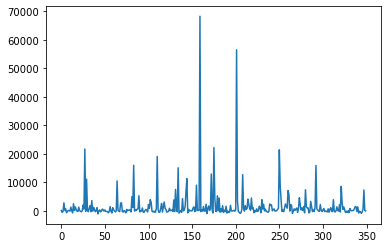

In [59]:
import matplotlib.pyplot as plt

plt.plot(range(350), y_test-y_pred)
plt.show()

In [62]:
y = abs(y_test - y_pred)
len(y[y >3000])

41